# Capstone Dummy Notebook
Owner: Jothika Sundaram
### This notebook contains the rough work of my Final Capstone Project. Here I will extract and clean data from various sources, perform various methods of exploratory analysis and draw any conclusions I find. 

### Data Requirements:

* City census data of Toronto and New York City
* Foursquare api location data


<h2><a id = "top"></a>Structure</h2><p> Click to jump to a section of the notebook</p>

1. <a href = "#item1"> Acquiring Census Data</a>

2. <a href = "#item2"> Acquiring Foursquare Data</a>

3. <a href = "#item3"> Creating a map of toronto </a>

4. <a href = "#item4"> Foursquare data for each Borough in Toronto</a>

5. <a href = "#item5"> Creating a Master Map for Toronto </a>

6. <a href = "#item6"> Analyzing Data from Master Map </a>   
    Sub item: <a href = "#charts"> Charts and Visuals </a>
    
7. <a href = "#item7"> Categories by Borough </a>  

8. <a href = "#item8">Clustering</a>  
    Sub item: <a href = "#onehot"> Onehot Encoding and Sorting </a>  
    Sub item: <a href = "#kmeans"> K-Means Clustering </a>  
    Sub item: <a href = "#mapcluster">Map Clustering</a>   
    Sub item: <a href = "#examineclusters">Examining Clusters</a>    
    
9. <a href = "#item9"> Discussion </a>  

10. <a href = "#item10"> Conclusions </a>

In [445]:
import pandas as pd
import numpy as np
import json # library to handle JSON files
import requests # library to handle requests
import io
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as cols
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
%matplotlib inline
import seaborn as sns
import math

<h2><a id = 'item1'></a> Acquiring Census Data of Toronto and New York</h2>

This is census data of the neighbourhood profiles in Toronto. I'm not using any of this data right now but I may need it later.

In [849]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
tor_data = pd.read_csv(url)


In [852]:
tor_data.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


This is population data of New York

In [843]:
url2 = 'https://www.baruch.cuny.edu/nycdata/population-geography/population.htm'
#https://www.baruch.cuny.edu/nycdata/population-geography/pop-demography.htm
demo = pd.read_html(url2)
demo[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,NaN
1,NaN,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,NaN
2,NaN,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,NaN
3,NaN,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,NaN
4,NaN,County,2000,2010,% Change 2000-10,Estimates*,Estimates*,Estimates*,Estimates*,Estimates*,Estimates*,NaN


<h2><a id = "item2"></a> Acquiring Foursquare data </h2> <a href = "#top"> back to top </a>

#### Toronto:

In [446]:
CLIENT_ID = 'NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV' # your Foursquare ID
CLIENT_SECRET = 'HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV
CLIENT_SECRET:HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J


In [447]:
# latitude and longitude of Toronto
tor_name = 'Toronto'
tor_lat = 43.6532
tor_lon = -79.3832
print('Latitude and longitude values of {} are {}, {}.'.format(tor_name, 
                                                               tor_lat, 
                                                               tor_lon))

Latitude and longitude values of Toronto are 43.6532, -79.3832.


### Explore venues in Toronto within 500 m radius


In [3]:
LIMIT = 500
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    tor_lat, 
    tor_lon,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV&client_secret=HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J&v=20180605&ll=43.6532,-79.3832&radius=10000&limit=500'

In [8]:
results = requests.get(url).json()

In [5]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
# results

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,postalCode
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,NaN
1,Nathan Phillips Square,Plaza,43.652270,-79.383516,M5H 2N1
2,Richmond Station,American Restaurant,43.651569,-79.379266,NaN
3,Fahrenheit Coffee,Coffee Shop,43.652384,-79.372719,M5C 3H5
4,Hogtown Smoke,Food Truck,43.649287,-79.374689,M4L 1H7


Can extract postal codes of each venue (except those that dont have one)

Can scrape this site to get boroughs of each postal code area and then merge the two tables together

In [448]:
postal_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
postal_codes = postal_codes[0]

In [449]:
postal_codes.dropna(inplace = True)

In [674]:
postal_codes.head()

,Borough,Neighborhood
Postal Code,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [451]:
codes = nearby_venues['postalCode']


In [452]:
# split the postal code values to we just get the area code
for i in range(len(codes)):
    if not pd.isnull(codes[i]):
        codes[i] = codes[i].split()[0]
        

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [453]:
len(codes)

100

In [454]:
postal_codes.set_index('Postal Code',inplace = True)

Create an array to store boroughs

#### This function takes a dataframe containing Foursquare data and will find the Borough location of each venue using its assigned postal code

In [455]:
def get_postal_borough(dataframe):
    borough = []
    codes = dataframe['postalCode']
    # split the postal code values to we just get the area code
    for i in range(len(codes)):
        if not pd.isnull(codes[i]):
            codes[i] = codes[i].split()[0]
    
    
    for i in range(len(codes)):
        if not pd.isnull(codes[i]) and codes[i] in postal_codes.index:
            borough.append(postal_codes.at[codes[i],'Borough'])
        else:
            borough.append('not assigned')
    return borough

Add this array as a column to the dataframe

In [20]:
nearby_venues['Borough'] = get_postal_borough(nearby_venues)

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
nearby_venues.head(10)

,name,categories,lat,lng,postalCode,Borough
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,NaN,not assigned
1,Nathan Phillips Square,Plaza,43.652270,-79.383516,M5H,Downtown Toronto
2,Richmond Station,American Restaurant,43.651569,-79.379266,NaN,not assigned
3,Fahrenheit Coffee,Coffee Shop,43.652384,-79.372719,M5C,Downtown Toronto
4,Hogtown Smoke,Food Truck,43.649287,-79.374689,M4L,East Toronto
5,St. Lawrence Market (South Building),Farmers Market,43.648743,-79.371597,M5E,Downtown Toronto
6,Alo,French Restaurant,43.648574,-79.396243,M5V,Downtown Toronto
7,Pai,Thai Restaurant,43.647923,-79.388579,M5H,Downtown Toronto
8,Yeti Nails & Spa,Cosmetics Shop,43.647938,-79.396330,M5V,Downtown Toronto
9,Sonic Boom,Record Shop,43.650859,-79.396985,NaN,not assigned


<h2><a id = "item3"></a> Map of Toronto </h2><a href = "#top"> back to top </a>

In [20]:
# !conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Folium imported')

Folium imported


In [53]:
map_toronto = folium.Map(location=[tor_lat, tor_lon], zoom_start=10)

for lat, lng, postal, borough, name in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['postalCode'],nearby_venues['Borough'], nearby_venues['name']):
    label = '{},{}'.format(name,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h2><a id = "item4"></a> Foursquare data for each Borough in Toronto</h2><a href = "#top"> back to top </a>

### I want to repeat this process for every borough in Toronto

In [456]:
unique_boroughs = postal_codes['Borough'].drop_duplicates()

In [457]:
# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [458]:
address = 'Etobicoke, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))

The geograpical coordinates are 43.6435559, -79.5656326.


#### This function uses the geocoders api to retrieve the coordinates of each borough in Toronto

In [459]:
def get_borough_coords():
    borough_coords = []
    for i in range(len(unique_boroughs)):
        address = unique_boroughs[i]+', Toronto'

        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
#         print('The geograpical coordinates of ' + unique_boroughs[i] + ' are {}, {}.'.format(latitude, longitude))
        borough_coords.append([unique_boroughs[i],latitude,longitude])
        
    return borough_coords

In [460]:
borough_coords = get_borough_coords()

In [461]:
borough_coords

[['North York', 43.7543263, -79.44911696639593],
 ['Downtown Toronto', 43.6541737, -79.38081164513409],
 ['Etobicoke', 43.6435559, -79.5656326],
 ['Scarborough', 43.773077, -79.257774],
 ['East York', 43.699971000000005, -79.33251996261595],
 ['York', 43.67910515, -79.49118414007154],
 ['East Toronto', 43.6534817, -79.3839347],
 ['West Toronto', 43.6534817, -79.3839347],
 ['Central Toronto', 43.6534817, -79.3839347],
 ['Mississauga', 43.678523999999996, -79.62912913064454]]

The geocoders data returned the same coordinates for East Toronto, West Toronto and Central Toronto. We may decide to drop the duplicate coordinates later on and just focus on one of those three areas.  
Lets turn this into a dataframe.

In [462]:
coords_df = pd.DataFrame(borough_coords, columns = ['Borough','Lat','Lon'])
coords_df.drop_duplicates(subset = ['Lat','Lon'],inplace = True)
coords_df.reset_index(inplace = True)
coords_df.drop(columns = ['index'],inplace = True)
coords_df

,Borough,Lat,Lon
0,North York,43.754326,-79.449117
1,Downtown Toronto,43.654174,-79.380812
2,Etobicoke,43.643556,-79.565633
3,Scarborough,43.773077,-79.257774
4,East York,43.699971,-79.332520
5,York,43.679105,-79.491184
6,East Toronto,43.653482,-79.383935
7,Mississauga,43.678524,-79.629129


In [463]:
master_df = pd.DataFrame(columns = ['name','categories','lat','lng','postalCode','Borough'])

In [464]:
master_df

,name,categories,lat,lng,postalCode,Borough


#### This function creates a dataframe for each borough with the available information retrieved from the Foursquare api, and returns a merged dataframe containing information for each borough  
Limit of 500 venues in a 10 km radius

In [465]:
def get_4square_for_boroughs(): #This is how we can merge multiple dataframes into one master frame
    i = 0
    frames = []
    while i < coords_df.shape[0]:
        lat = coords_df.loc[i,'Lat']
        lon = coords_df.loc[i,'Lon']
        LIMIT = 500
        radius = 10000
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lon,
            radius, 
            LIMIT)
    #         url # display URL
    #     return url
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']

        df = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
        df =df.loc[:, filtered_columns]

        # filter the category for each row
        df['venue.categories'] = df.apply(get_category_type, axis=1)

        # clean columns
        df.columns = [col.split(".")[-1] for col in df.columns]

        # create a Borough column using the get_postal_borough funtion
        df['Borough'] = get_postal_borough(df)
        frames.append(df)
        i+=1
    return pd.concat(frames)

In [466]:
master_df = get_4square_for_boroughs()

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [467]:
 master_df.reset_index(inplace = True)

In [547]:
master_df

,index,name,categories,lat,lng,postalCode,Borough,Neighbourhood
0,0,Earl Bales Park,Park,43.753043,-79.436228,NaN,not assigned,NaN
1,1,Archers Arena,Recreation Center,43.754101,-79.467200,M3K,North York,Downsview
2,2,Best for Bride in Toronto,Bridal Shop,43.755789,-79.437834,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
3,3,LCBO,Liquor Store,43.732717,-79.454717,M3K,North York,Downsview
4,4,True North Climbing,Climbing Gym,43.745507,-79.474332,M3K,North York,Downsview
...,...,...,...,...,...,...,...,...
795,95,LCBO,Liquor Store,43.631432,-79.553904,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."
796,96,James Gardens Park,Garden,43.671256,-79.513338,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
797,97,Krispy Kreme,Donut Shop,43.609845,-79.693501,NaN,not assigned,NaN
798,98,Longo's,Grocery Store,43.658087,-79.725847,L6Y,not assigned,NaN


Now we have the venue information that was available from each Borough.  There are many venues that are not assigned a Borough.
We can also see that a large majority of these venues are coming from Downtown Toronto.    
Let's add a column for the neighbourhood of each venue. 


In [469]:
# loop through each postal code and append its corresponding neighbourhood(s)
neighs = []
for i in master_df['postalCode']:
    if not pd.isnull(i) and i in postal_codes.index:
        neighs.append(postal_codes.loc[i,'Neighborhood'])
    else:
        neighs.append(np.nan)

In [470]:
master_df['Neighbourhood'] = neighs

In [471]:
master_df

,index,name,categories,lat,lng,postalCode,Borough,Neighbourhood
0,0,Earl Bales Park,Park,43.753043,-79.436228,NaN,not assigned,NaN
1,1,Archers Arena,Recreation Center,43.754101,-79.467200,M3K,North York,Downsview
2,2,Best for Bride in Toronto,Bridal Shop,43.755789,-79.437834,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
3,3,LCBO,Liquor Store,43.732717,-79.454717,M3K,North York,Downsview
4,4,True North Climbing,Climbing Gym,43.745507,-79.474332,M3K,North York,Downsview
...,...,...,...,...,...,...,...,...
795,95,LCBO,Liquor Store,43.631432,-79.553904,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."
796,96,James Gardens Park,Garden,43.671256,-79.513338,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
797,97,Krispy Kreme,Donut Shop,43.609845,-79.693501,NaN,not assigned,NaN
798,98,Longo's,Grocery Store,43.658087,-79.725847,L6Y,not assigned,NaN


For all the venues not assigned a neighbourhood, lets try to assign them the closest one based on their coordinates. This may not be 100% accurate but its better than having a large number of NaN values.  
First lets split our dataframe into two, one with all of the valid neighbourhood values and one with all of the NaN neighbourhood values.

In [472]:
notnan_df = master_df[pd.notna(master_df['Neighbourhood'])].reset_index()

In [473]:
notnan_df.head()

,level_0,index,name,categories,lat,lng,postalCode,Borough,Neighbourhood
0,1,1,Archers Arena,Recreation Center,43.754101,-79.467200,M3K,North York,Downsview
1,2,2,Best for Bride in Toronto,Bridal Shop,43.755789,-79.437834,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
2,3,3,LCBO,Liquor Store,43.732717,-79.454717,M3K,North York,Downsview
3,4,4,True North Climbing,Climbing Gym,43.745507,-79.474332,M3K,North York,Downsview
4,5,5,Nordstrom,Clothing Store,43.726054,-79.449443,M6A,North York,"Lawrence Manor, Lawrence Heights"


In [474]:
nan_df = master_df[pd.isnull(master_df['Neighbourhood'])].reset_index()

In [475]:
nan_df.drop('index',1,inplace=True)

In [476]:
nan_df.head()

,level_0,name,categories,lat,lng,postalCode,Borough,Neighbourhood
0,0,Earl Bales Park,Park,43.753043,-79.436228,NaN,not assigned,NaN
1,9,Maryam Hotel,Hotel,43.766961,-79.401199,NaN,not assigned,NaN
2,16,Toronto Downsview Airport (YZD),Airport,43.738883,-79.470111,NaN,not assigned,NaN
3,21,Yummy Market,Grocery Store,43.764681,-79.467710,NaN,not assigned,NaN
4,23,Scotiabank Pond,Hockey Arena,43.745775,-79.475957,NaN,not assigned,NaN


In [477]:
# Function to slice coordinate values to a certain number of decimal points without rounding
def floor_coords(value, decimals):
    factor = 1 / (10 ** decimals)
    return (value // factor) * factor

This algorithm will match similar coordinates from the NaN datafram to the not NaN dataframe and assign those corresponding neighbourhoods to the missing values

In [478]:
index = 0;
while index <nan_df.shape[0]:
    # get coords of the missing neighbourhood venues
    nanlat = floor_coords(nan_df.loc[index,'lat'],2)
    nanlon = floor_coords(nan_df.loc[index,'lng'],2)
    
    
    for i in range(notnan_df.shape[0]):
        # compare with coords of existing neighbourhoods
        lat = floor_coords(notnan_df.loc[i,'lat'],2)
        lon = floor_coords(notnan_df.loc[i,'lng'],2)
       
        if nanlat==lat and nanlon==lon:
            nan_df.loc[index,'Neighbourhood'] = notnan_df.loc[i,'Neighbourhood']
            nan_df.loc[index,'Borough'] = notnan_df.loc[i,'Borough']
            nan_df.loc[index,'postalCode'] = notnan_df.loc[i,'postalCode']
#             print(nan_df.loc[index,'Borough'])
            break
    index+=1 
    


In [479]:
nan_df.head()

,level_0,name,categories,lat,lng,postalCode,Borough,Neighbourhood
0,0,Earl Bales Park,Park,43.753043,-79.436228,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
1,9,Maryam Hotel,Hotel,43.766961,-79.401199,M2N,North York,"Willowdale, Willowdale East"
2,16,Toronto Downsview Airport (YZD),Airport,43.738883,-79.470111,NaN,not assigned,NaN
3,21,Yummy Market,Grocery Store,43.764681,-79.467710,NaN,not assigned,NaN
4,23,Scotiabank Pond,Hockey Arena,43.745775,-79.475957,M3K,North York,Downsview


In [480]:
nan_df[pd.isnull(nan_df['Neighbourhood'])].head()

,level_0,name,categories,lat,lng,postalCode,Borough,Neighbourhood
2,16,Toronto Downsview Airport (YZD),Airport,43.738883,-79.470111,NaN,not assigned,NaN
3,21,Yummy Market,Grocery Store,43.764681,-79.467710,NaN,not assigned,NaN
5,30,Amadeus Fine Cakes,Dessert Shop,43.802582,-79.448743,L4J,not assigned,NaN
6,32,Sababa,Middle Eastern Restaurant,43.795669,-79.434273,L4J,not assigned,NaN
8,46,Sunny Dragon 해룡반점,Korean Restaurant,43.795204,-79.434526,NaN,not assigned,NaN


Even after running that algorithm, we still have over 100 missing neighbourhood values. However, this is a small number compared to the size of the master dataframe, so it may be safe to drop these values.

In [481]:
master_data = master_df.dropna(subset=['Neighbourhood'])

In [482]:
master_data = pd.concat([master_data,nan_df[pd.notna(nan_df['Neighbourhood'])]])

In [548]:
# master_data.reset_index(inplace = True)
master_data.drop('index',1,inplace = True)

In [549]:
len(master_data['Neighbourhood'].unique())

75

One last step, now that we've added the venue **neighbourhoods**, we need to find the **neighbourhood coordinates**

In [675]:
import re
def get_neigh_coords():
    neigh_coords = []
    try:
        for i in range(len(master_data['Neighbourhood'].unique())):
            
            neigh = master_data['Neighbourhood'].unique()[i].split(',')[0]
            neigh = re.split('-',neigh)[0]
            
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(neigh+', Toronto')
            latitude = location.latitude
            longitude = location.longitude
    #         print('The geograpical coordinates of ' + master_data.loc[i,'Neighbourhood'] + ' are {}, {}.'.format(latitude, longitude))
            neigh_coords.append([master_data['Neighbourhood'].unique()[i],latitude,longitude])
    except AttributeError:
        print(i,master_data['Neighbourhood'].unique()[i])
    return neigh_coords

In [676]:
neigh_coords = get_neigh_coords()

In [677]:
neigh_coords = pd.DataFrame(neigh_coords)

In [678]:
neigh_coords.rename(columns = {0:'Neighbourhood',1:'lat',2:'lon'},inplace = True)

In [679]:
neigh_coords.set_index('Neighbourhood',inplace = True)

Now we've gotten coordinated for each neighbourhood. Lets add this to our master dataframe

In [680]:
neigh_coords.head()

,lat,lon
Neighbourhood,,
Downsview,43.749299,-79.462248
"Bathurst Manor, Wilson Heights, Downsview North",43.763893,-79.456367
"Lawrence Manor, Lawrence Heights",43.722079,-79.437507
"Willowdale, Willowdale East",43.761510,-79.410923
"Bedford Park, Lawrence Manor East",43.737388,-79.410925


In [688]:
nlats = []
nlons = []

for i in master_data['Neighbourhood']:
    nlats.append(neigh_coords.loc[i,'lat'])
    nlons.append(neigh_coords.loc[i,'lon'])

In [689]:
master_data['neigh_lat'] = nlats
master_data['neigh_lon'] = nlons

In [690]:
master_data.head()

,name,categories,lat,lng,postalCode,Borough,Neighbourhood,neigh_lat,neigh_lon
1,Archers Arena,Recreation Center,43.754101,-79.467200,M3K,North York,Downsview,43.749299,-79.462248
2,Best for Bride in Toronto,Bridal Shop,43.755789,-79.437834,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.763893,-79.456367
3,LCBO,Liquor Store,43.732717,-79.454717,M3K,North York,Downsview,43.749299,-79.462248
4,True North Climbing,Climbing Gym,43.745507,-79.474332,M3K,North York,Downsview,43.749299,-79.462248
5,Nordstrom,Clothing Store,43.726054,-79.449443,M6A,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507


<h2><a id = "item5"></a> Let's Create a Master Map </h2> <a href = '#top'> back to top </a>

This map will show the available venue data from all Boroughs in Toronto

In [692]:
from folium import plugins

master_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=12)

boroughs = plugins.MarkerCluster().add_to(master_map)
neighs = plugins.MarkerCluster().add_to(master_map)

for neigh, nlat, nlon in zip(neigh_coords.index,neigh_coords['lat'],neigh_coords['lon']):
    label = 'Neighbourhood: {}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [nlat, nlon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff2974',
        fill_opacity=0.7,
        parse_html=False).add_to(master_map)  


for lat, lng, postal, borough, name in zip(master_data['lat'], master_data['lng'], master_data['postalCode'],master_data['Borough'], master_data['name']):
    label = 'Venue: {},{}'.format(name,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(master_map)  
    

    
master_map

Now we can view the venues located in each borough

<h2><a id = 'item6'></a> Analyzing Data from Master Map </h2> <a href = "#top">back to top</a>

#### Let's do some data analysis from all these venues

In [557]:
master_data['categories'].unique()

array(['Recreation Center', 'Bridal Shop', 'Liquor Store', 'Climbing Gym',
       'Clothing Store', 'Japanese Restaurant', 'Jewelry Store',
       'Furniture / Home Store', 'Café', 'French Restaurant',
       'Steakhouse', 'Chocolate Shop', 'Bookstore', 'Shopping Mall',
       'Sandwich Place', 'Ramen Restaurant', 'Seafood Restaurant',
       'Theater', 'Massage Studio', 'Warehouse Store', 'Thai Restaurant',
       'Park', 'Creperie', 'Racetrack', 'Tea Room', 'Sushi Restaurant',
       'Bakery', 'Athletics & Sports', 'Supermarket',
       'Vietnamese Restaurant', 'Music Store', 'Flower Shop',
       'Coffee Shop', 'Grocery Store', 'Bagel Shop', 'Gastropub',
       'Bubble Tea Shop', 'Pizza Place', 'Garden', 'Gourmet Shop',
       'Pharmacy', 'Toy / Game Store', 'Italian Restaurant', 'Brewery',
       'Dessert Shop', 'Doner Restaurant', 'Plaza', 'Food Truck',
       'Farmers Market', 'Restaurant', 'Vegetarian / Vegan Restaurant',
       'Historic Site', 'Cosmetics Shop', 'Hotel', 'Dance

In [558]:
len(master_data['categories'].unique())

132

We have many unique categories. Lets clean some of this data up.  
Looking at the unique categories, we can immediately see that Toronto is dominated by **restaurant chains**. Lets focus on those venues for now.

In [559]:
master_data[master_data['categories']=="Restaurant"]

,name,categories,lat,lng,postalCode,Borough,Neighbourhood,neigh_lat,neigh_lon
106,GEORGE Restaurant,Restaurant,43.653346,-79.374445,M5C,Downtown Toronto,St. James Town,49.865306,14.472511
157,Impact Kitchen,Restaurant,43.656369,-79.356980,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.703020,-79.387575
161,Rasa,Restaurant,43.662757,-79.403988,M5S,Downtown Toronto,"University of Toronto, Harbord",43.656119,-79.384670
217,The Keg Steakhouse + Bar - Sherway,Restaurant,43.613148,-79.559466,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.662273,-79.576516
231,The Pie Commission,Restaurant,43.623548,-79.512265,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.616677,-79.496805
283,The Keg Steakhouse + Bar - Dixon Road,Restaurant,43.686329,-79.597353,M9W,Etobicoke,"Northwest, West Humber - Clairville",43.653482,-79.383935
353,The Keg Steakhouse + Bar – Estate Drive,Restaurant,43.782573,-79.235046,M1H,Scarborough,Cedarbrae,43.756467,-79.226692
471,Impact Kitchen,Restaurant,43.656369,-79.356980,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.703020,-79.387575
545,Rasa,Restaurant,43.662757,-79.403988,M5S,Downtown Toronto,"University of Toronto, Harbord",43.656119,-79.384670
611,GEORGE Restaurant,Restaurant,43.653346,-79.374445,M5C,Downtown Toronto,St. James Town,49.865306,14.472511


We can see that restuarants that aren't under an ethnic category are mostly steakhouses and other restaurants. We can categorize them under "Other"

Lets make a dataframe that only contains restaurant venues

In [560]:
restaurants =[]
for i in master_data['categories']:
    if("Restaurant" in i):
        if len(i.split())==1:
            restaurants.append("Other")
        else:
            restaurants.append(i)

In [561]:
restaurants_df = pd.DataFrame(restaurants)
restaurants_df.count()

0    138
dtype: int64

In [562]:
restaurants_df[0].unique()

array(['Japanese Restaurant', 'French Restaurant', 'Ramen Restaurant',
       'Seafood Restaurant', 'Thai Restaurant', 'Sushi Restaurant',
       'Vietnamese Restaurant', 'Italian Restaurant', 'Doner Restaurant',
       'Other', 'Vegetarian / Vegan Restaurant', 'Mexican Restaurant',
       'Tapas Restaurant', 'Fast Food Restaurant',
       'Eastern European Restaurant', 'New American Restaurant',
       'Xinjiang Restaurant', 'Indian Restaurant', 'Greek Restaurant',
       'American Restaurant', 'Sri Lankan Restaurant', 'Asian Restaurant',
       'Caribbean Restaurant', 'Falafel Restaurant',
       'Middle Eastern Restaurant', 'Chinese Restaurant',
       'Cantonese Restaurant', 'Turkish Restaurant',
       'Filipino Restaurant', 'Hakka Restaurant', 'Ethiopian Restaurant',
       'Mediterranean Restaurant', 'Korean Restaurant'], dtype=object)

In [563]:
restaurants_df = pd.DataFrame(restaurants_df.groupby(by=[0]).size())

In [564]:
restaurants_df.rename(columns={0: "Count"},inplace = True)

In [565]:
restaurants_df.reset_index(inplace = True)

In [566]:
restaurants_df.rename(columns={0: "Category"},inplace = True)

<h3><a id = "charts"></a> Charts and Visuals </h3><a href = "#top">back to top</a>

Lets create a barchart to visualize the frequency of these categories

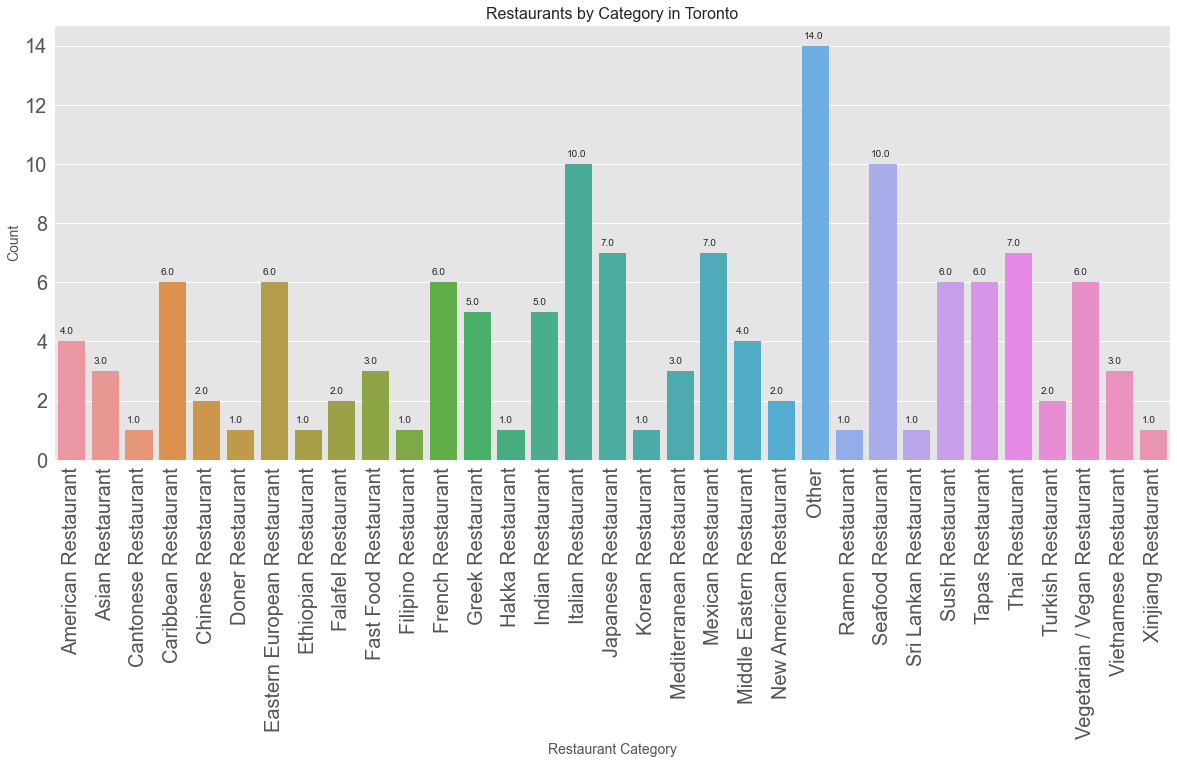

In [567]:
import matplotlib.patches as patches
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Category",y="Count",data = restaurants_df)
ax.set_xlabel('Restaurant Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.set_title('Restaurants by Category in Toronto',fontsize = 16) # set title and labels

ax.tick_params(labelsize=20)
plt.xticks(rotation=90)


for num in ax.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.25))

We can see that out of the valid restaurants in the dataframe, most of them fall under the "Other" category, Seafood and Italian restaurants. This might give us an idea about the ethnic populations that lives in those areas.   
#### Next, lets compare the other venue categories. Since we already know that restaurant venues have the highest population, we can ignore that category

In [568]:
all_categories = []
for i in master_df['categories']:
    if("Restaurant" in i):
        continue
    else:
        all_categories.append(i)

In [569]:
categories_df = pd.DataFrame(all_categories,columns = ['Category'])

In [570]:
categories_df

,Category
0,Park
1,Recreation Center
2,Bridal Shop
3,Liquor Store
4,Climbing Gym
...,...
610,Liquor Store
611,Garden
612,Donut Shop
613,Grocery Store


In [571]:
categories_df = pd.DataFrame(categories_df.groupby(by=['Category']).size())

In [572]:
categories_df.rename(columns = {0:'Count'},inplace = True)

In [573]:
categories_df.reset_index(inplace = True)

In [574]:
categories_df.head()

,Category,Count
0,Airport,1
1,Airport Lounge,2
2,Arts & Crafts Store,7
3,Athletics & Sports,5
4,Auto Dealership,1


Lets create a bar chart to see the frequencies of all categories

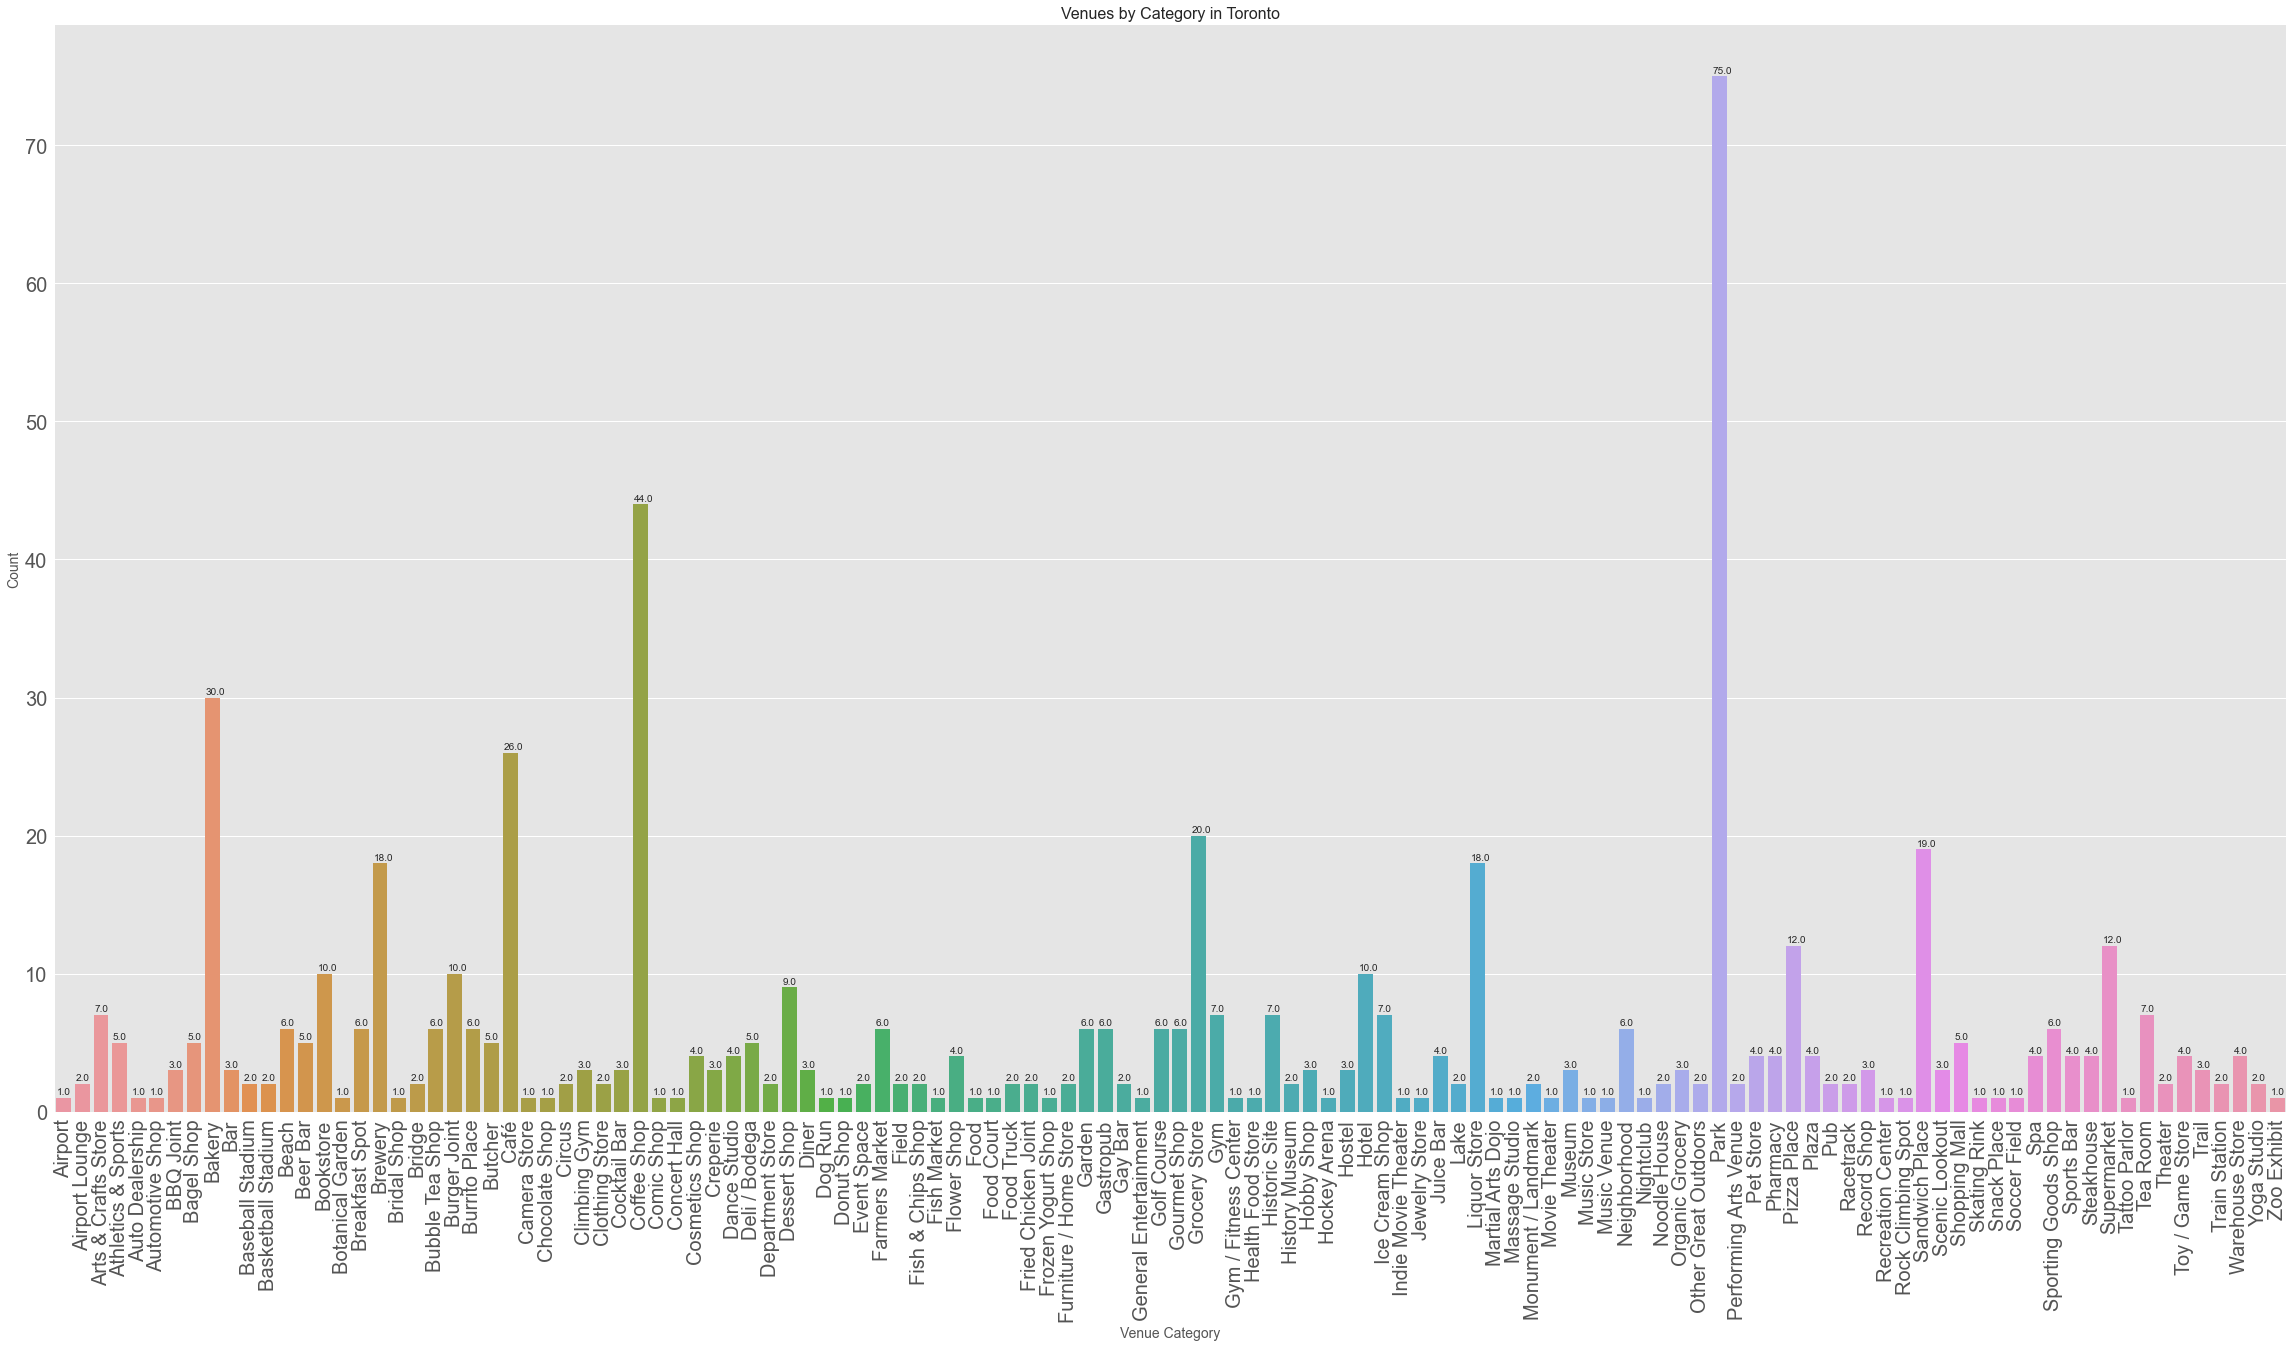

In [575]:
plt.figure(figsize = (40,20))
ax = sns.barplot(x="Category",y="Count",data = categories_df)
ax.set_xlabel('Venue Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax.tick_params(labelsize=20)
plt.xticks(rotation=90)


for num in ax.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.25))

The chart is overwhelmed with the number of categories. Maybe we should break them down.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

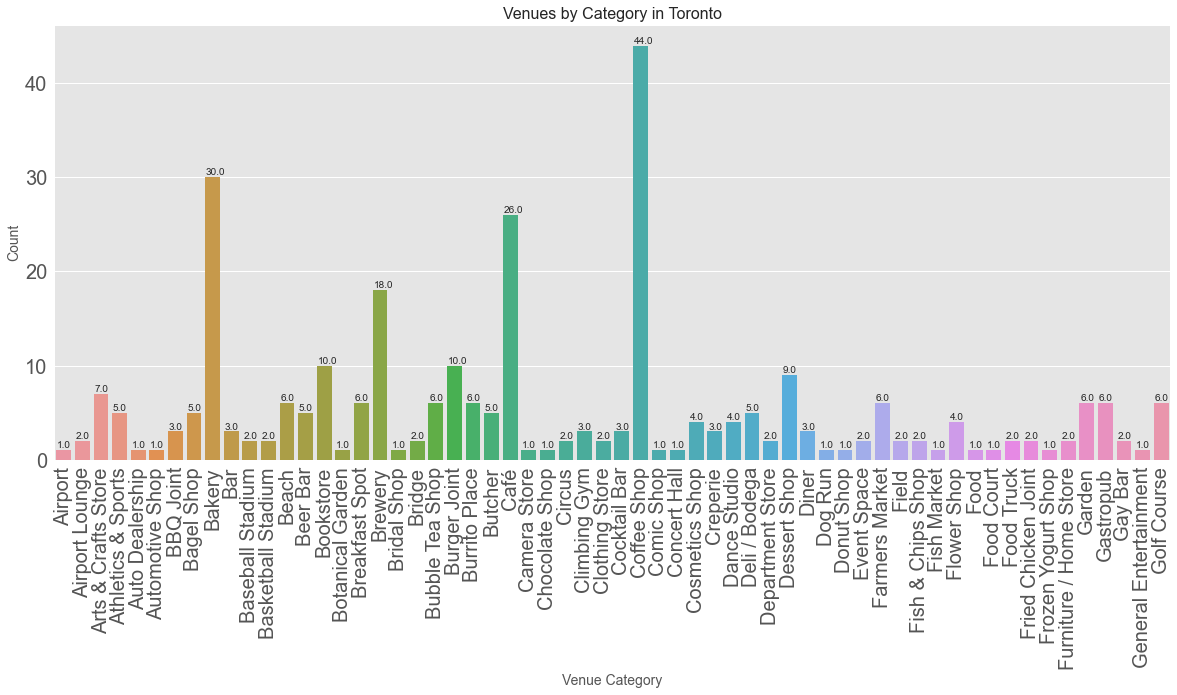

In [576]:
plt.figure(figsize = (20,8))
ax1 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[:60])
ax1.set_xlabel('Venue Category', fontsize = 14)
ax1.set_ylabel('Count', fontsize = 14)

ax1.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax1.tick_params(labelsize=20)

for num in ax1.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax1.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
    

plt.xticks(rotation=90)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

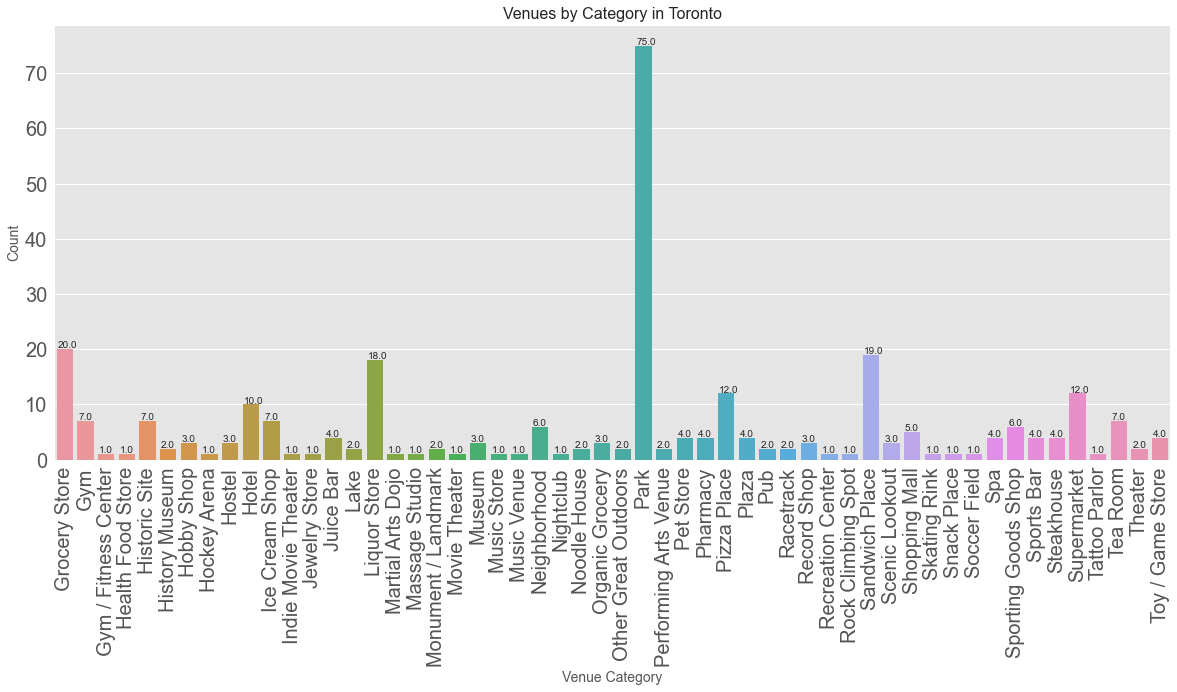

In [577]:
plt.figure(figsize = (20,8))
ax2 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[61:115],)
ax2.set_xlabel('Venue Category', fontsize = 14)
ax2.set_ylabel('Count', fontsize = 14)

ax2.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax2.tick_params(labelsize=20)

for num in ax2.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax2.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
plt.xticks(rotation=90)

We can see that after restaurants, parks and coffee shops are the next most populous venue types.  
#### Next, I want to see how these venues are spead across all the boroughs of Toronto


<h2><a id = "item7"></a>Categories by Borough</h2><a href="#top">back to top</a>

To be honest, I can't think of an efficient way to group the category counts by boroughs. I think I'll have to make a dataframe for each borough and merge them all together.

In [815]:
cat_by_boro = []
for i in range(master_data.shape[0]):
    if "Restaurant" in master_data.iat[i,1]:
        cat_by_boro.append(["Restaurant",master_data.iat[i,5]])
    else:
        cat_by_boro.append([master_data.iat[i,1],master_data.iat[i,5]])

In [816]:
cat_by_boro = pd.DataFrame(cat_by_boro, columns = ['Category','Borough'])

In [817]:
cat_by_boro.head()

,Category,Borough
0,Recreation Center,North York
1,Bridal Shop,North York
2,Liquor Store,North York
3,Climbing Gym,North York
4,Clothing Store,North York


In [818]:
cat_by_boro['Borough'].unique()

array(['North York', 'Central Toronto', 'West Toronto', 'York',
       'Downtown Toronto', 'East Toronto', 'Etobicoke', 'Scarborough',
       'East York'], dtype=object)

In [819]:
master_cats = pd.DataFrame(columns = cat_by_boro['Borough'].unique())

In [820]:
master_cats['Category'] = cat_by_boro.drop_duplicates(subset = ['Category'])['Category']

In [821]:
master_cats.head()

,North York,Central Toronto,West Toronto,York,Downtown Toronto,East Toronto,Etobicoke,Scarborough,East York,Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recreation Center
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bridal Shop
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liquor Store
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Climbing Gym
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clothing Store


Gotta make a column for each borough and fill the table with the right data

In [822]:
master_cats.set_index('Category',inplace = True)

This loop will determine the number of each type in venue for each borough and populate the master_cats dataframe 

In [823]:
for col_name in master_cats: # for each column
    for row_index in master_cats.index: # for each row index
        df = pd.DataFrame(cat_by_boro[cat_by_boro['Borough']==col_name])
        count = df.groupby('Category').size()
        if row_index in count: #count the number of venues in each category for each borough
            master_cats.loc[row_index,col_name] = count[row_index]
        else:
            master_cats.loc[row_index,col_name] = 0

In [824]:
master_cats.head()

,North York,Central Toronto,West Toronto,York,Downtown Toronto,East Toronto,Etobicoke,Scarborough,East York
Category,,,,,,,,,
Recreation Center,1,0,0,0,0,0,0,0,0
Bridal Shop,1,0,0,0,0,0,0,0,0
Liquor Store,2,0,0,1,6,0,5,2,0
Climbing Gym,1,0,0,0,0,0,2,0,0
Clothing Store,1,0,0,0,0,0,0,0,0


Now we can try visualzing the distribution of these venues across all boroughs

Text(0, 0.5, 'Count')

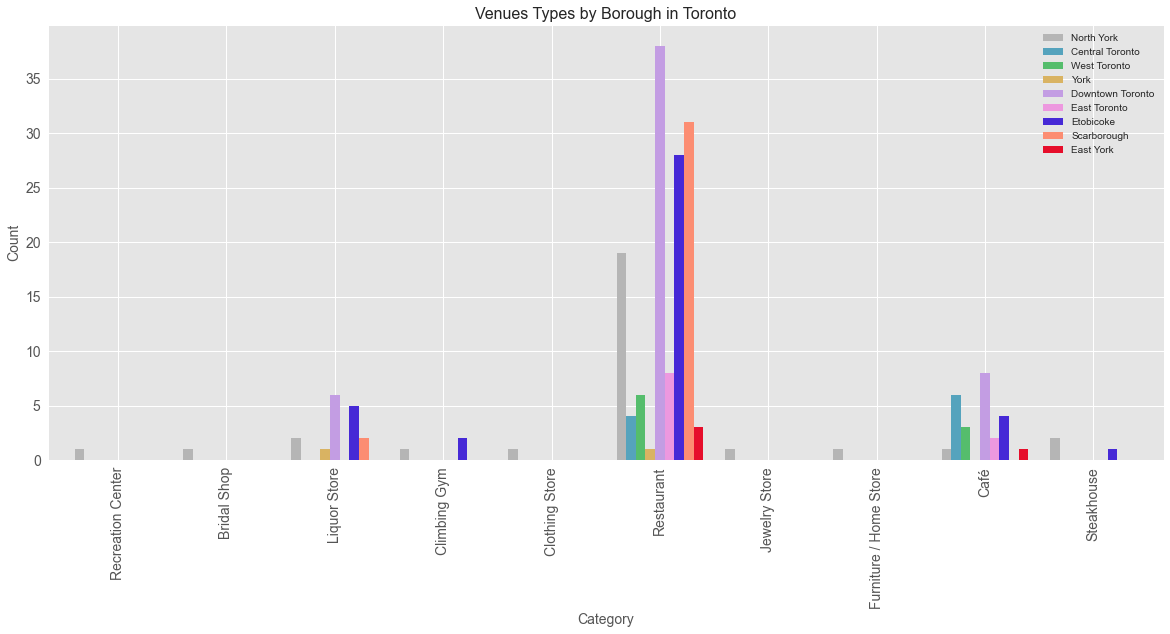

In [825]:
colors = ['#b5b5b5','#55a3bd','#55bd6c','#d9b362','#c39de3','#ed98df', '#4629d6','#fc8d72','#e60e2b','#087343']
ax = master_cats[:10].plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Borough in Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

There are too many categories to view at once. We would have to make many bar charts. I think i'll skip to the clustering part.

<h2><a id = "item8"></a> Clustering </h2> <a href = "#top">back to top</a>

<h4><a id = "onehot"></a>Before we can start clustering, we will need to apply one hot encoding to our data. </h4>

In [694]:
# create dataframe with dummy values for categories
tor_onehot = pd.get_dummies(master_data[['categories']], prefix="", prefix_sep="")

In [695]:
tor_onehot['Neighbourhood'] = master_data['Neighbourhood']

In [696]:
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Xinjiang Restaurant,Yoga Studio
1,Downsview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downsview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downsview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,"CN Tower, King and Spadina, Railway Lands, Har...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"The Kingsway, Montgomery Road, Old Mill North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [697]:
tor_onehot.shape

(630, 133)

### Let's group the rows by neighbourhood and take themean frequency of occurence of each venue category

In [698]:
tor_grouped = tor_onehot.groupby('Neighbourhood').mean().reset_index()
tor_grouped

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Xinjiang Restaurant,Yoga Studio
0,Agincourt,0.0,0.0,0.090909,0.0,0.0,0.00,0.090909,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"Willowdale, Newtonbrook",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.500000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
71,"Willowdale, Willowdale East",0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.076923,0.076923,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
72,"Willowdale, Willowdale West",0.0,0.0,0.000000,0.0,0.0,0.25,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
73,Woodbine Heights,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


#### Lets analyse the top 5 most frequent venues of each neighbourhood

In [699]:
num_top_venues = 5

for boro in tor_grouped['Neighbourhood']:
    print("----"+boro+"----")
    temp = tor_grouped[tor_grouped['Neighbourhood'] == boro].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                   Venue  Freq
0   Caribbean Restaurant  0.18
1  Sri Lankan Restaurant  0.09
2    Sporting Goods Shop  0.09
3            Supermarket  0.09
4         Breakfast Spot  0.09


----Alderwood, Long Branch----
           Venue  Freq
0    Pizza Place  0.17
1  Grocery Store  0.17
2           Café  0.17
3           Park  0.17
4   Burger Joint  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
                     Venue  Freq
0                     Park  0.50
1              Bridal Shop  0.25
2              Supermarket  0.25
3      American Restaurant  0.00
4  New American Restaurant  0.00


----Bayview Village----
                 Venue  Freq
0         Liquor Store   1.0
1  American Restaurant   0.0
2            Nightclub   0.0
3               Museum   0.0
4          Music Store   0.0


----Bedford Park, Lawrence Manor East----
                 Venue  Freq
0                 Café   0.5
1         Gourmet Shop   0.5
2  American Restaurant   0.0
3        

                 Venue  Freq
0   Seafood Restaurant  0.43
1     Tapas Restaurant  0.29
2         Dessert Shop  0.14
3         Liquor Store  0.14
4  American Restaurant  0.00


----University of Toronto, Harbord----
                 Venue  Freq
0            Gastropub  0.27
1               Museum  0.27
2           Restaurant  0.27
3             Beer Bar  0.18
4  American Restaurant  0.00


----Victoria Village----
                 Venue  Freq
0    Indian Restaurant   1.0
1  American Restaurant   0.0
2         Noodle House   0.0
3               Museum   0.0
4          Music Store   0.0


----West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale----
                 Venue  Freq
0  Sporting Goods Shop   0.2
1        Grocery Store   0.2
2         Burger Joint   0.2
3         Liquor Store   0.2
4             Pharmacy   0.1


----Weston----
                 Venue  Freq
0         Liquor Store   1.0
1  American Restaurant   0.0
2            Nightclub   0.0
3               Museum

We need to store this information in a dataframe. First we need a function to sort the venues from most common to least common

In [700]:
def get_sorted_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [800]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in range(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tor_venues_sorted = pd.DataFrame(columns=columns)
tor_venues_sorted['Neighbourhood'] = tor_grouped['Neighbourhood']

for ind in range(tor_grouped.shape[0]):
    tor_venues_sorted.iloc[ind, 1:] = get_sorted_venues(tor_grouped.iloc[ind, :], num_top_venues)


In [801]:
tor_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Caribbean Restaurant,Gym / Fitness Center,Supermarket,Asian Restaurant,Coffee Shop,Breakfast Spot,Bakery,Sporting Goods Shop,Cantonese Restaurant,Sri Lankan Restaurant
1,"Alderwood, Long Branch",Burger Joint,Pizza Place,Grocery Store,Park,Café,Seafood Restaurant,Ethiopian Restaurant,Farmers Market,Falafel Restaurant,Event Space
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Supermarket,Bridal Shop,Yoga Studio,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eastern European Restaurant
3,Bayview Village,Liquor Store,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant,Fish Market
4,"Bedford Park, Lawrence Manor East",Gourmet Shop,Café,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant


<h3><a id = "kmeans"></a> K-Means Clustering</h3> <a href = "#top">back to top</a>

In [802]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

First we will set a cluster number of 5, then we will use the elbow visualizer to determine if 5 is really the optimal number of clusters or not

In [803]:
# set number of clusters
kclusters = 5

tor_clustering = tor_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 1, 3, 3, 3, 3, 3, 2])

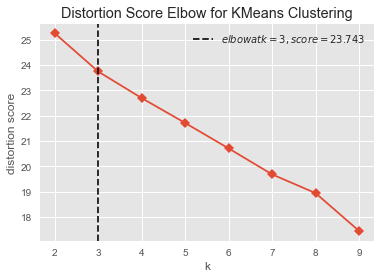

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x245592B0>,
                 k=None, model=None, timings=False)

In [804]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), tor_clustering, k=(2,10), timings = False)

#### The results given by our kmeans visualizer shows that 3 clusters would actually be the optimal number. However, I am going to use a larger number of clusters to see how the different venues are concentrated around the city.

In [805]:
# set number of clusters
kclusters = 6

tor_clustering = tor_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 1, 5, 3, 3, 3, 1, 3, 2])

Now we need to merge the cluster labels into a dataframe and add the latitude and logitude coordinates


In [808]:
# add clustering labels
# tor_venues_sorted.drop('Cluster Labels', 1,inplace=True)
tor_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = pd.DataFrame(master_data.drop(['name','categories','lat','lng','postalCode'],1))

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
tor_merged.drop_duplicates(subset = ['Neighbourhood'],inplace=True)

In [809]:
tor_merged.reset_index(inplace = True)
tor_merged.drop('index',1,inplace = True)

Now each neighbourhood is assigned a cluster label. We can visualize these clusters on a map.

In [810]:
tor_merged.head()

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Downsview,43.749299,-79.462248,3,Jewelry Store,Hockey Arena,Climbing Gym,Racetrack,Recreation Center,Falafel Restaurant,Liquor Store,Steakhouse,Park,Warehouse Store
1,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.763893,-79.456367,1,Park,Supermarket,Bridal Shop,Yoga Studio,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eastern European Restaurant
2,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507,3,Furniture / Home Store,Clothing Store,Shopping Mall,Chocolate Shop,Pharmacy,Department Store,Dessert Shop,Diner,Dance Studio,Fast Food Restaurant
3,North York,"Willowdale, Willowdale East",43.761510,-79.410923,3,Grocery Store,Sushi Restaurant,Hotel,Thai Restaurant,Japanese Restaurant,Steakhouse,Ramen Restaurant,Seafood Restaurant,Bubble Tea Shop,Theater
4,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,3,Gourmet Shop,Café,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant


<h3><a id = "mapcluster"></a>Map Clustering </h3> <a href = "#top">back to top</a>

Now we can cluster the neighbourhoods based on their most common venues.

In [814]:
# create map
map_clusters = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [cols.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = ['#ff00d4', '#4629d6','#fc8d72','#ff1760','#42ffef', '#34eb80','#ffeb91']
for lat, lon, poi, cluster in zip(tor_merged['neigh_lat'], tor_merged['neigh_lon'], tor_merged['Neighbourhood'], tor_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhood: ' + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=markers_colors[cluster],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=1).add_to(map_clusters)
    
       
for lat, lon, name in zip(coords_df['Lat'], coords_df['Lon'], coords_df['Borough']):
    label = folium.Popup('Borough: ' + name, parse_html=True)
    folium.CircleMarker(
        
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.4).add_to(map_clusters)
    
    
map_clusters


<h3><a id = "examineclusters"></a> Examining the Clusters</h3> <a href = "#top">back to top</a>

Now we can examine each cluster to determine the defining categories.

#### Cluster 0

In [785]:
tor_merged[tor_merged['Cluster Labels'] == 0].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,North York,Hillcrest Village,43.799664,-79.365019,0,Bubble Tea Shop,Yoga Studio,Fish Market,Dance Studio,Department Store,Dessert Shop,Diner,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant


Only 1 neighbourhood is assigned in cluster 0, so we can assume it is defined by the 1st most common venue: Bubble Tea Shop

#### Cluster 1

In [780]:
tor_merged[tor_merged['Cluster Labels'] == 1].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.763893,-79.456367,1,Park,Supermarket,Bridal Shop,Yoga Studio,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Eastern European Restaurant
16,North York,Don Mills,43.775347,-79.345944,1,Park,Shopping Mall,Botanical Garden,Yoga Studio,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant
31,Central Toronto,"The Annex, North Midtown, Yorkville",43.670338,-79.407117,1,Park,Yoga Studio,Fish & Chips Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Doner Restaurant,Eastern European Restaurant
34,Downtown Toronto,Christie,43.664111,-79.418405,1,Park,Café,Grocery Store,Event Space,Fish & Chips Shop,Dance Studio,Department Store,Dessert Shop,Diner,Doner Restaurant
44,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.600763,-79.505264,1,Park,Ice Cream Shop,Liquor Store,Italian Restaurant,Mexican Restaurant,Skating Rink,Café,Falafel Restaurant,Fast Food Restaurant,Farmers Market
61,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.711170,-79.248177,1,Park,Beach,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant
63,East York,Woodbine Heights,43.699930,-79.319132,1,Breakfast Spot,Park,Butcher,Yoga Studio,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant
72,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.650917,-79.440022,1,Park,Music Venue,Movie Theater,Yoga Studio,Filipino Restaurant,Dance Studio,Department Store,Dessert Shop,Diner,Doner Restaurant


These neighbourhoods were assigned cluster 1. Their most common venues are Park locations. 

#### Cluster 2

In [781]:
tor_merged[tor_merged['Cluster Labels'] == 2].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,North York,"Willowdale, Newtonbrook",43.761510,-79.410923,2,Thai Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
11,Central Toronto,Roselawn,43.699456,-79.454616,2,Coffee Shop,Trail,Café,Gastropub,Yoga Studio,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
17,York,Humewood-Cedarvale,43.685721,-79.425116,2,Coffee Shop,Indian Restaurant,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Doner Restaurant
19,Downtown Toronto,St. James Town,43.669403,-79.372704,2,Coffee Shop,American Restaurant,Japanese Restaurant,Restaurant,Middle Eastern Restaurant,Creperie,Gastropub,Garden,Gourmet Shop,Dance Studio
27,Downtown Toronto,Church and Wellesley,43.665524,-79.383801,2,Dance Studio,Bubble Tea Shop,Coffee Shop,Gay Bar,Yoga Studio,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
28,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648095,-79.379025,2,Gym,Fish Market,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant
35,East Toronto,Studio District,43.649585,-79.390683,2,Coffee Shop,Hotel,French Restaurant,Pizza Place,Neighborhood,Eastern European Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
46,Scarborough,Cedarbrae,43.756467,-79.226692,2,Indian Restaurant,Sushi Restaurant,Gym,Xinjiang Restaurant,Pharmacy,Coffee Shop,Caribbean Restaurant,Restaurant,Falafel Restaurant,Event Space
59,North York,Victoria Village,43.732658,-79.311189,2,Indian Restaurant,Yoga Studio,Eastern European Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Doner Restaurant
67,Central Toronto,"Moore Park, Summerhill East",43.690388,-79.383297,2,Spa,Coffee Shop,Eastern European Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Yoga Studio


In this cluster, the first two most common venues for these nieghbourhoods are dominated by Coffee Shops and ethnic restaurants. 

#### Cluster 3

In [782]:
tor_merged[tor_merged['Cluster Labels'] == 3].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Downsview,43.749299,-79.462248,3,Jewelry Store,Hockey Arena,Climbing Gym,Racetrack,Recreation Center,Falafel Restaurant,Liquor Store,Steakhouse,Park,Warehouse Store
2,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507,3,Furniture / Home Store,Clothing Store,Shopping Mall,Chocolate Shop,Pharmacy,Department Store,Dessert Shop,Diner,Dance Studio,Fast Food Restaurant
3,North York,"Willowdale, Willowdale East",43.761510,-79.410923,3,Grocery Store,Sushi Restaurant,Hotel,Thai Restaurant,Japanese Restaurant,Steakhouse,Ramen Restaurant,Seafood Restaurant,Bubble Tea Shop,Theater
4,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,3,Gourmet Shop,Café,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant
5,North York,York Mills West,43.744039,-79.406657,3,French Restaurant,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant,Fish Market
6,North York,"Willowdale, Willowdale West",43.761510,-79.410923,3,Vietnamese Restaurant,Bookstore,Bagel Shop,Doner Restaurant,Yoga Studio,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
7,Central Toronto,Lawrence Park,43.729199,-79.403252,3,Flower Shop,Toy / Game Store,Sandwich Place,Tea Room,Bakery,Garden,Diner,Dessert Shop,Department Store,Filipino Restaurant
8,North York,"Northwood Park, York University",43.754135,-79.504480,3,Pizza Place,Thai Restaurant,Music Store,Italian Restaurant,Massage Studio,Gastropub,Fast Food Restaurant,Creperie,Dance Studio,Department Store
13,Central Toronto,Davisville North,43.697936,-79.397291,3,Café,Coffee Shop,Park,Bakery,Italian Restaurant,Tea Room,Supermarket,Diner,Dessert Shop,Doner Restaurant
14,West Toronto,"Little Portugal, Trinity",43.647413,-79.431116,3,Brewery,Cocktail Bar,Ice Cream Shop,Bookstore,Tapas Restaurant,Sandwich Place,Pizza Place,Japanese Restaurant,Fried Chicken Joint,Farmers Market


This cluster is a bit harder to determine the defining categories since its so diverse. Looking at the first two common venues of these neighbourhoods, again we see a lot of Restaurants and eateries.

#### Cluster 4

In [783]:
tor_merged[tor_merged['Cluster Labels'] == 4].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,North York,"North Park, Maple Leaf Park, Upwood Park",43.718690,-79.477534,4,Bakery,Yoga Studio,Ethiopian Restaurant,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant
43,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.649826,-79.494334,4,Bakery,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Doner Restaurant


In this cluster, its clear that the most common venues of these neighbourhoods are Bakeries and Yoga Studios

In [784]:
tor_merged[tor_merged['Cluster Labels'] == 5].head(10)

,Borough,Neighbourhood,neigh_lat,neigh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,North York,Bayview Village,43.769197,-79.376662,5,Liquor Store,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant,Fish Market
73,York,Weston,43.700161,-79.516247,5,Liquor Store,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Eastern European Restaurant,Fish Market


Finally, the neighbourhoods in this cluster share the same common venues. We can assume this cluster is defined by Liquor Stores. 

<h2><a id = "item9"></a> Discussion</h2> <a href = "#top">back to top</a>

From the data we've collected and analysed so far, it is clear that the venues in Toronto's neighbourhoods are dominated by restaurant chains of a variety of ethic backgrounds. 

Neighbourhoods in cluster 2 are centred around the Downtown/Central Toronto area, as well as around North and East York. It seems that many ethnic restaurant chains choose to open in that area. Neighbourhoods in cluster 3 are spread out across the city. Aside from restaurants, the common venues in these areas include Yoga studios and athletic recreation centres. 

Neighbourhoods in cluster 1 have an interesting spread. The most common venues in these areas are Park locations, so they must have a lot of green spaces. These neighbourhoods are mostly situated to the southern side of the city and less in the northern areas near York and North York.    

Clusters 0, 4 and 5 have very few neighbourhoods assigned to them, so there is not enough information to make a thorough analysis on them.
 

<h2><a id = "item10"></a> Conclusions</h2> <a href = "#top">back to top</a>

Now that we've analyzed the spread of all these different venues across the city, we now have an idea of what type of business tend to open up in each area of the city. This information will be useful for stakeholders such as busniess owners and startup companies to decide where they should open a branch.    

For example, a restaurant company can see that most of the restaurant chains are centered around Downtown Toronto. These restaurants are all of different ethnic cuisines and are in a highly competitive area, so it is upto that company to decide whether they would like to join the competition, or open up in an area with less competition.   

Another example, we can see where the neighbourhoods that have lots of parks and greenspaces are located. Where there are parks, there must be a lot of active children and youth. This could be a location to open a children's toy store, or an outdoor recreational store. 


The purpose of this analysis was to examine the spread of different venue types across the city and then cluster neighbourhoods together based on the most common venue in that area. The results of this project should be able to guide viewers and stakeholders of the most profitable locations to open a certain type of business.
